In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
Ride_df=pd.read_csv("rideshare_pricing_data.csv")

In [3]:
Ride_df

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,distance,drivers_available,ride_requests,peak_hour,temperature,precipitation,visibility,event_nearby,price
0,40.874540,-74.126359,41.229998,-73.861855,1.065366,13,46,0,27.385724,0,9.542978,0,26.010994
1,41.450714,-74.167088,40.684512,-74.040708,0.298857,40,64,0,20.378497,1,6.355968,0,15.600458
2,41.231994,-74.323846,40.846640,-73.535501,0.405258,10,31,0,18.313723,1,10.682139,0,10.756709
3,41.098658,-73.892733,41.163281,-74.281022,0.597809,28,41,0,37.013580,0,8.508607,0,21.057554
4,40.656019,-74.023376,40.982089,-73.912144,0.683162,30,53,1,-14.801414,0,9.589979,1,23.649685
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,-73.622961,41.452275,-73.745966,2.922119,23,12,0,22.132327,0,9.083888,0,15.899768
9996,41.397509,-74.453186,41.247824,-73.735473,0.769301,38,99,0,3.413087,0,9.393715,0,10.884197
9997,41.446708,-74.196302,40.519456,-74.230431,4.146848,14,75,0,17.223095,0,10.957781,0,19.121226
9998,40.897488,-74.056680,40.901005,-74.065680,2.208232,38,86,0,12.792122,0,12.144354,0,12.990045


In [4]:
Ride_df.dropna(inplace=True)

In [5]:
Ride_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8557 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pickup_latitude    8557 non-null   float64
 1   pickup_longitude   8557 non-null   float64
 2   dropoff_latitude   8557 non-null   float64
 3   dropoff_longitude  8557 non-null   float64
 4   distance           8557 non-null   float64
 5   drivers_available  8557 non-null   int64  
 6   ride_requests      8557 non-null   int64  
 7   peak_hour          8557 non-null   int64  
 8   temperature        8557 non-null   float64
 9   precipitation      8557 non-null   int64  
 10  visibility         8557 non-null   float64
 11  event_nearby       8557 non-null   int64  
 12  price              8557 non-null   float64
dtypes: float64(8), int64(5)
memory usage: 935.9 KB


In [6]:
from geopy.distance import geodesic

In [7]:
def haversine_distance(row):
    pickup = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff = (row['dropoff_latitude'], row['dropoff_longitude'])
    return geodesic(pickup, dropoff).km

In [8]:
Ride_df['haversine_distance'] = Ride_df.apply(haversine_distance, axis=1)

In [9]:
Ride_df

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,distance,drivers_available,ride_requests,peak_hour,temperature,precipitation,visibility,event_nearby,price,haversine_distance
0,40.874540,-74.126359,41.229998,-73.861855,1.065366,13,46,0,27.385724,0,9.542978,0,26.010994,45.307408
1,41.450714,-74.167088,40.684512,-74.040708,0.298857,40,64,0,20.378497,1,6.355968,0,15.600458,85.751169
2,41.231994,-74.323846,40.846640,-73.535501,0.405258,10,31,0,18.313723,1,10.682139,0,10.756709,78.901660
3,41.098658,-73.892733,41.163281,-74.281022,0.597809,28,41,0,37.013580,0,8.508607,0,21.057554,33.384435
4,40.656019,-74.023376,40.982089,-73.912144,0.683162,30,53,1,-14.801414,0,9.589979,1,23.649685,37.406487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,40.624614,-73.598962,40.769316,-73.575300,1.675627,46,76,0,4.058622,0,13.135812,1,26.611317,16.192877
9996,41.397509,-74.453186,41.247824,-73.735473,0.769301,38,99,0,3.413087,0,9.393715,0,10.884197,62.346407
9997,41.446708,-74.196302,40.519456,-74.230431,4.146848,14,75,0,17.223095,0,10.957781,0,19.121226,103.014709
9998,40.897488,-74.056680,40.901005,-74.065680,2.208232,38,86,0,12.792122,0,12.144354,0,12.990045,0.853044


In [11]:
import numpy as np

# Calculate demand_multiplier based on percentile for high and low demand
high_demand_percentile = 75
low_demand_percentile = 25

Ride_df['demand_multiplier'] = np.where(Ride_df['ride_requests'] > np.percentile(Ride_df['ride_requests'], high_demand_percentile),
                                     Ride_df['ride_requests'] / np.percentile(Ride_df['ride_requests'], high_demand_percentile),
                                     Ride_df['ride_requests'] / np.percentile(Ride_df['ride_requests'], low_demand_percentile))

# Calculate supply_multiplier based on percentile for high and low supply
high_supply_percentile = 75
low_supply_percentile = 25

Ride_df['supply_multiplier'] = np.where(Ride_df['drivers_available'] > np.percentile(Ride_df['drivers_available'], low_supply_percentile),
                                     np.percentile(Ride_df['drivers_available'], high_supply_percentile) / Ride_df['drivers_available'],
                                     np.percentile(Ride_df['drivers_available'], low_supply_percentile) / Ride_df['drivers_available'])

# Define price adjustment factors for high and low demand/supply
demand_threshold_high = 1.2  # Higher demand threshold
demand_threshold_low = 0.8  # Lower demand threshold
supply_threshold_high = 0.8  # Higher supply threshold
supply_threshold_low = 1.2  # Lower supply threshold

# Calculate adjusted_ride_cost for dynamic pricing
Ride_df['New_Price'] = Ride_df['price'] * (
    np.maximum(Ride_df['demand_multiplier'], demand_threshold_low) *
    np.maximum(Ride_df['supply_multiplier'], supply_threshold_high))


In [12]:
Ride_df['profit_percentage'] = ((Ride_df['New_Price'] - Ride_df['price']) / Ride_df['price']) * 100
# Identify profitable rides where profit percentage is positive
profitable_rides = Ride_df[Ride_df['profit_percentage'] > 0]

# Identify loss rides where profit percentage is negative
loss_rides = Ride_df[Ride_df['profit_percentage'] < 0]


import plotly.graph_objects as go

# Calculate the count of profitable and loss rides
profitable_count = len(profitable_rides)
loss_count = len(loss_rides)



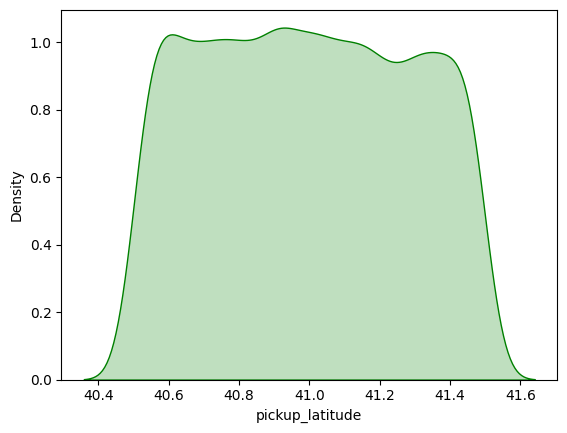

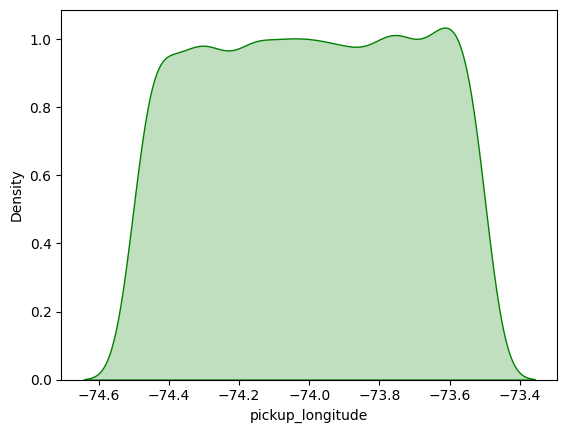

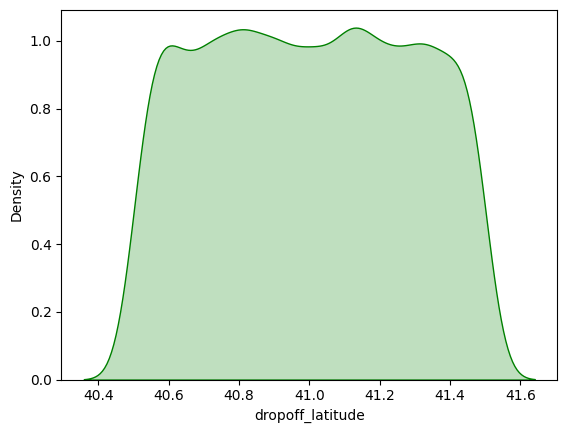

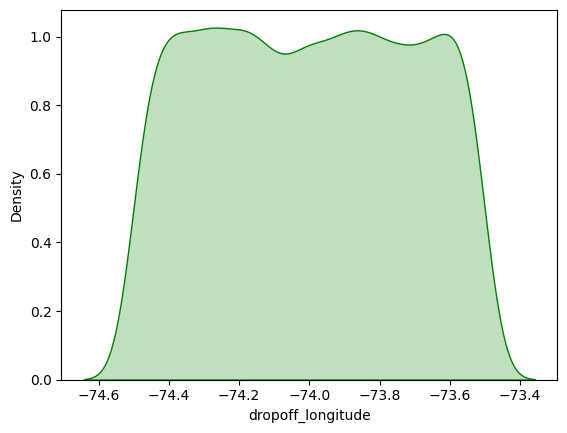

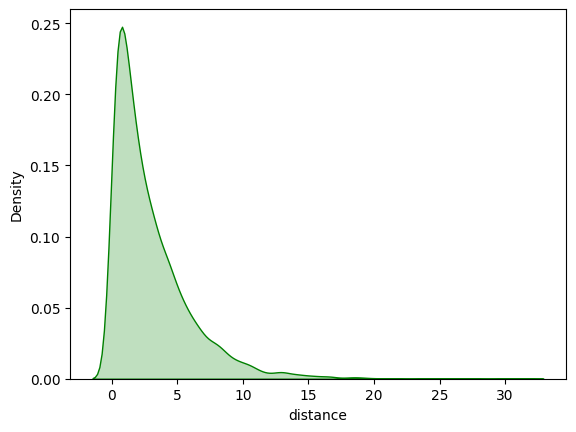

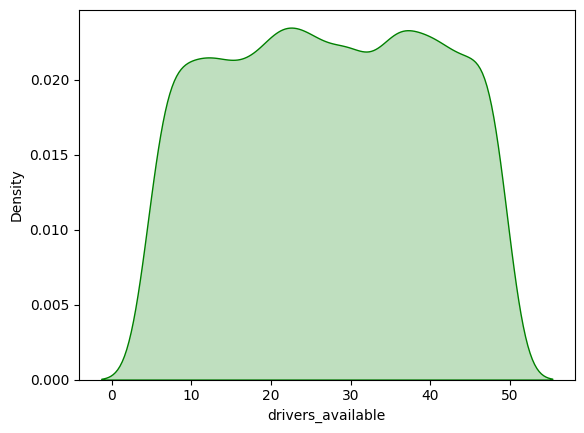

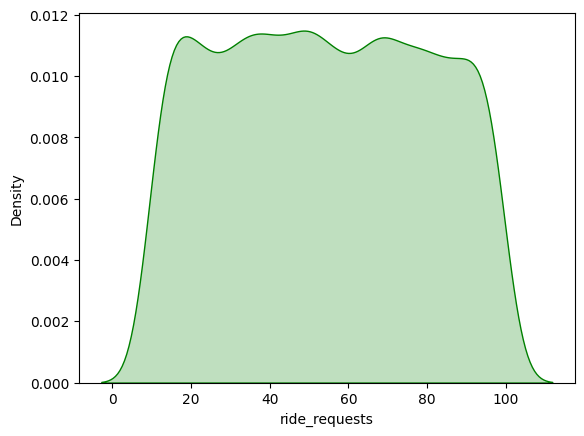

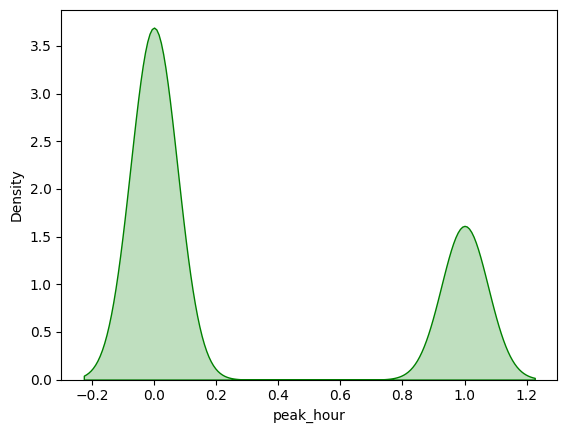

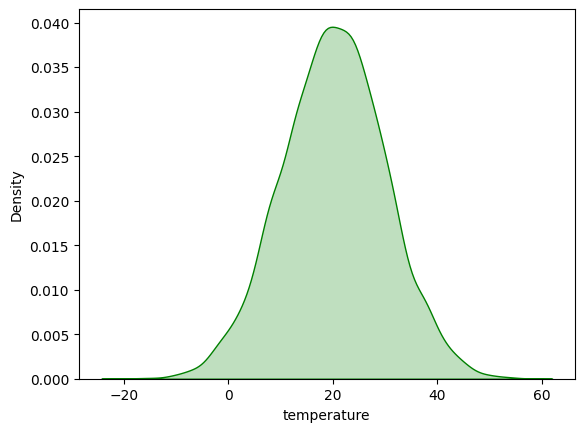

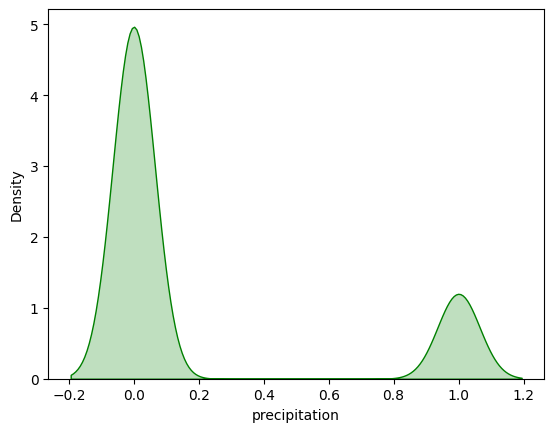

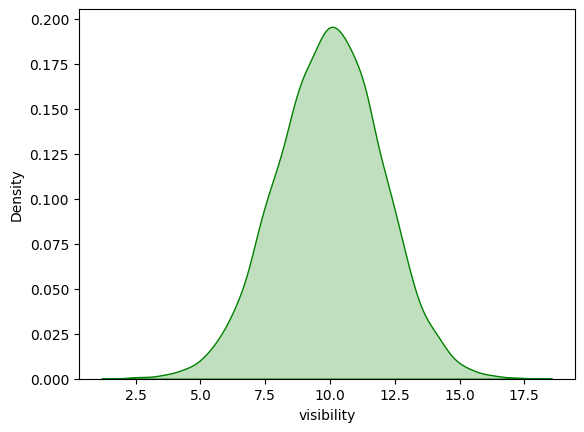

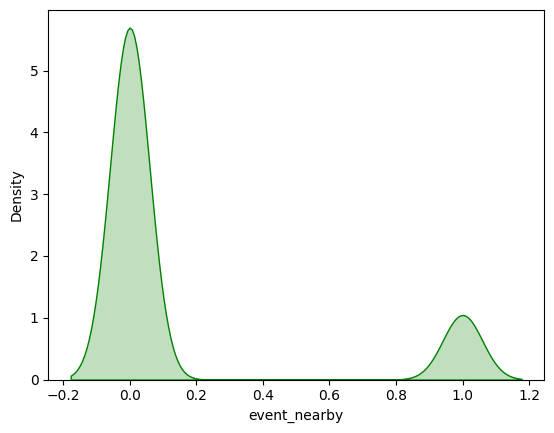

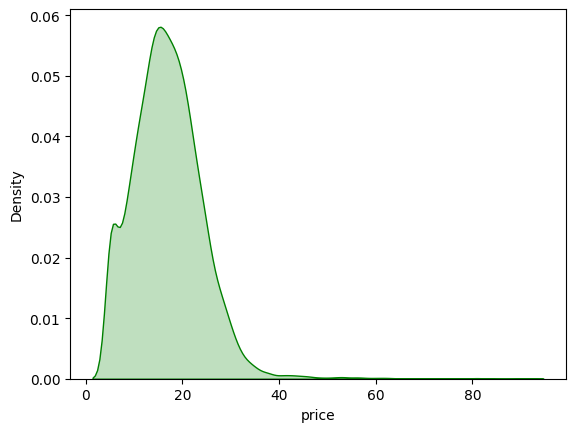

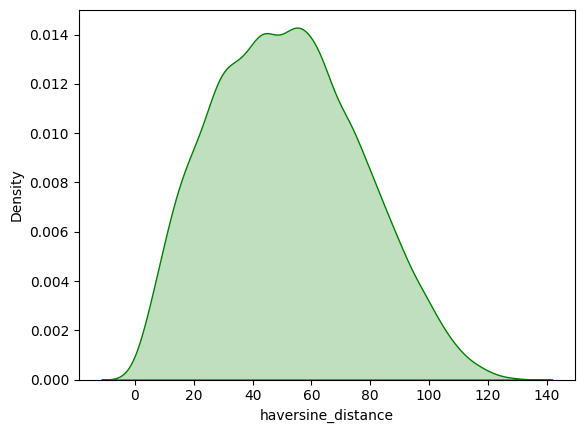

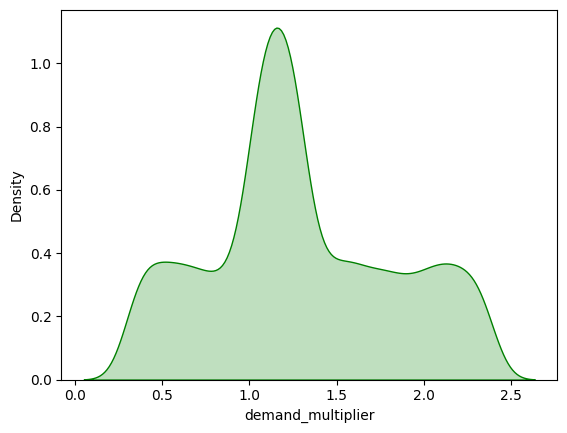

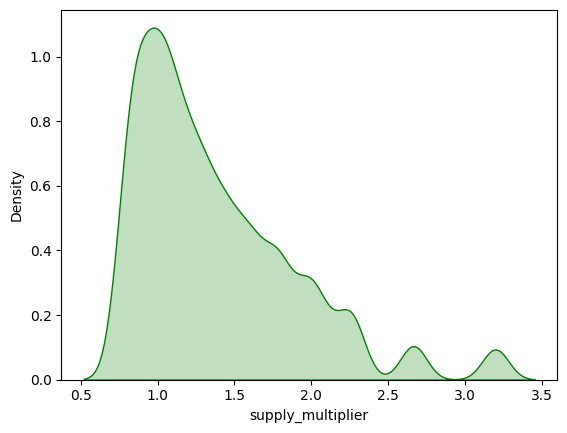

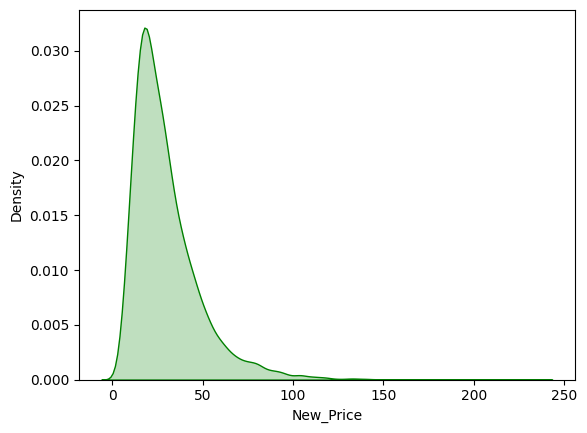

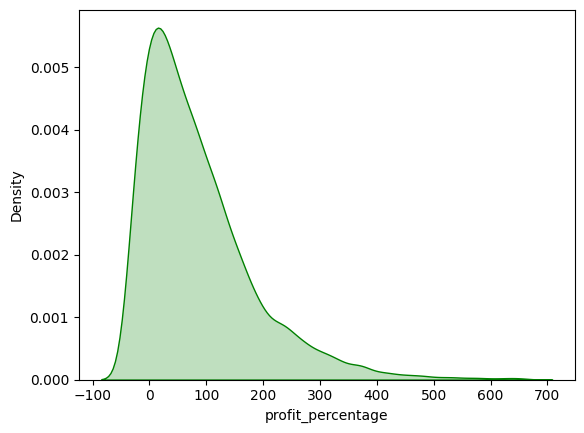

In [13]:
for i in Ride_df.columns:
    if Ride_df[i].dtype != 'object' :
        sns.kdeplot(Ride_df[i],fill=True,color="g"), "warn_Singular=false"
        plt.show()

pickup_latitude


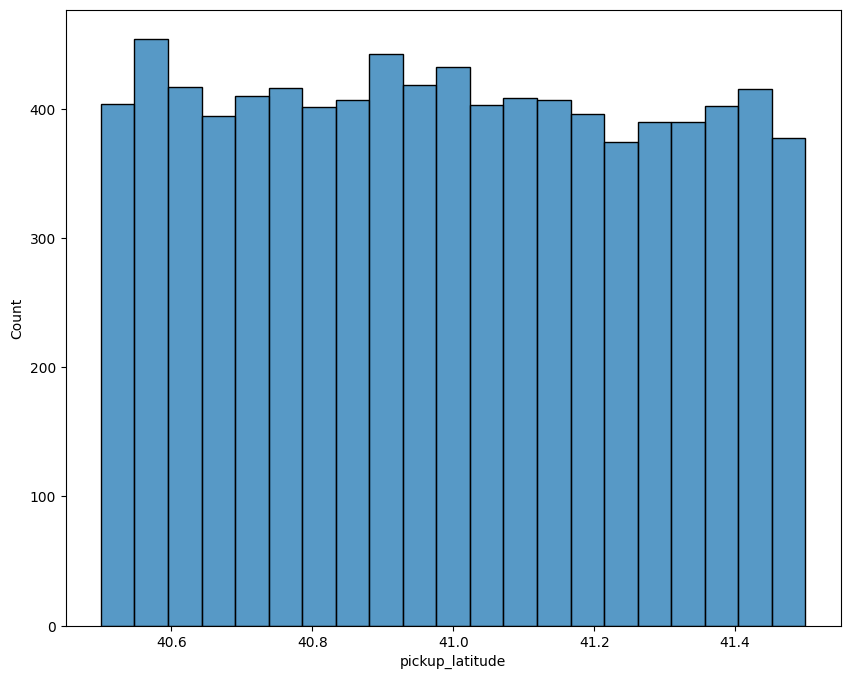

pickup_longitude


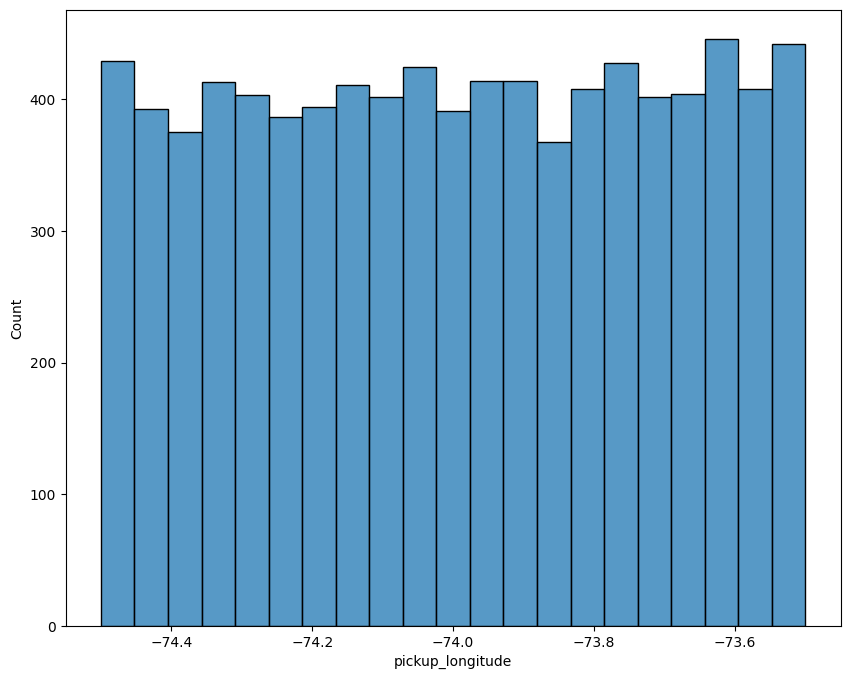

dropoff_latitude


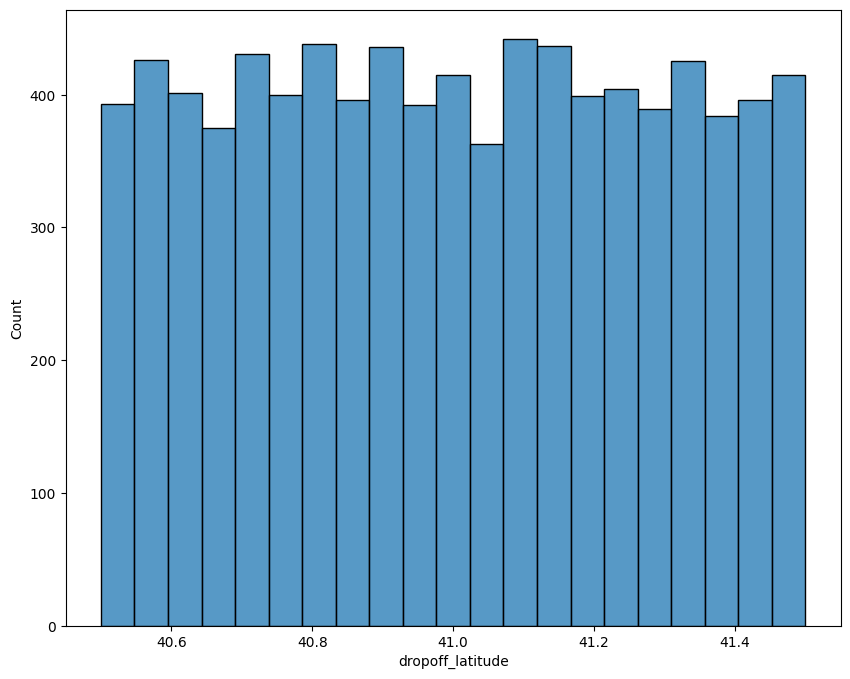

dropoff_longitude


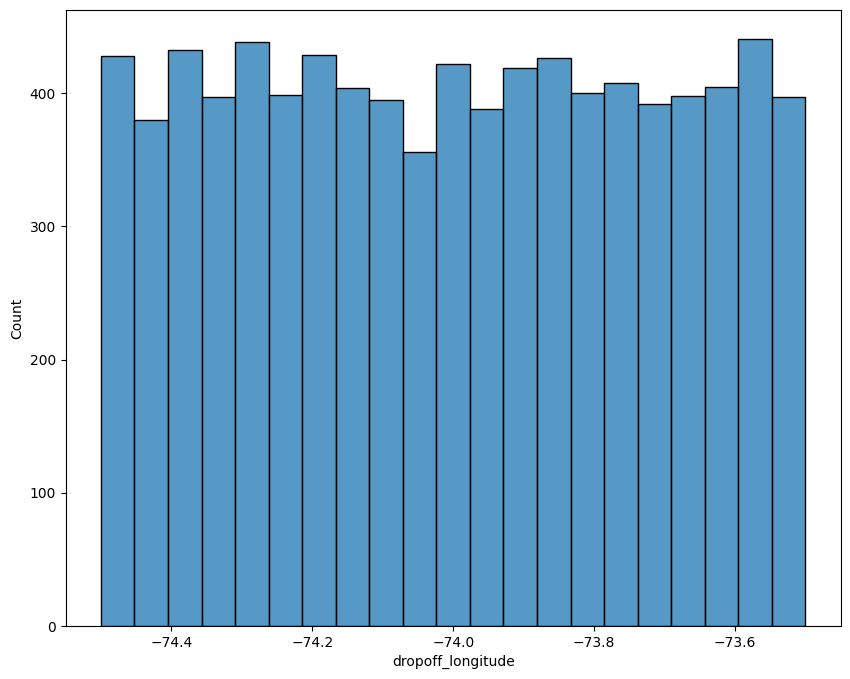

distance


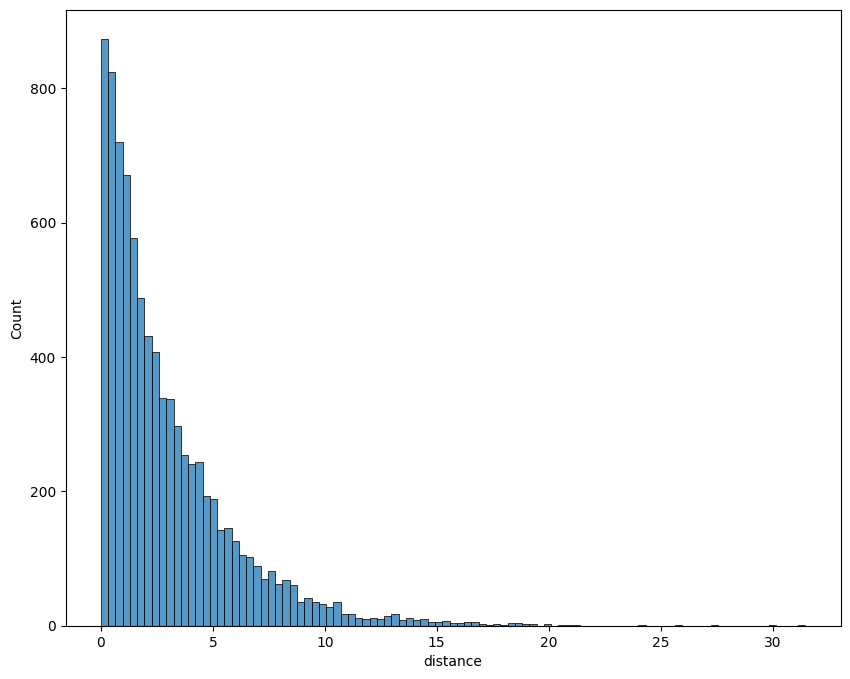

drivers_available


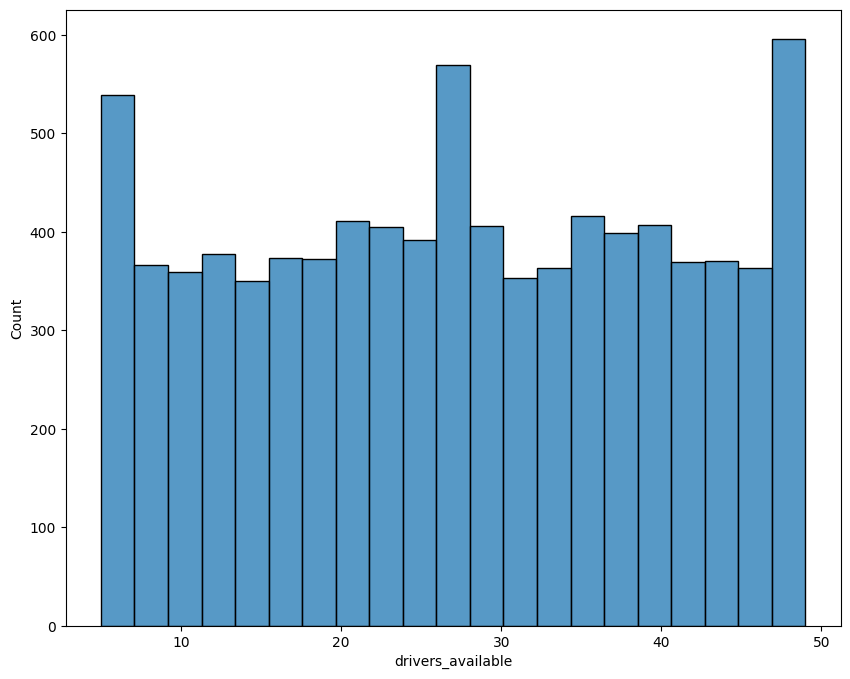

ride_requests


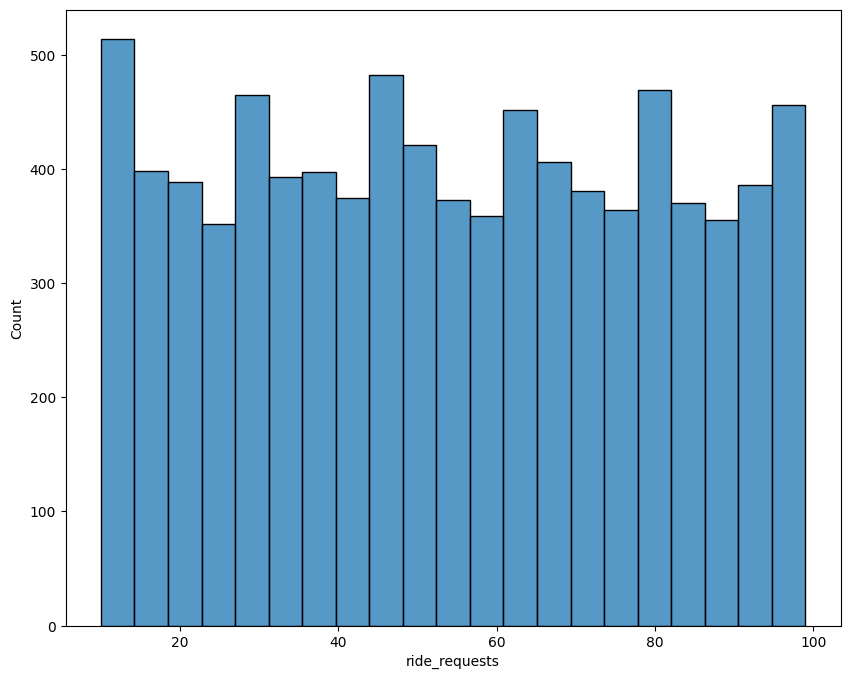

peak_hour


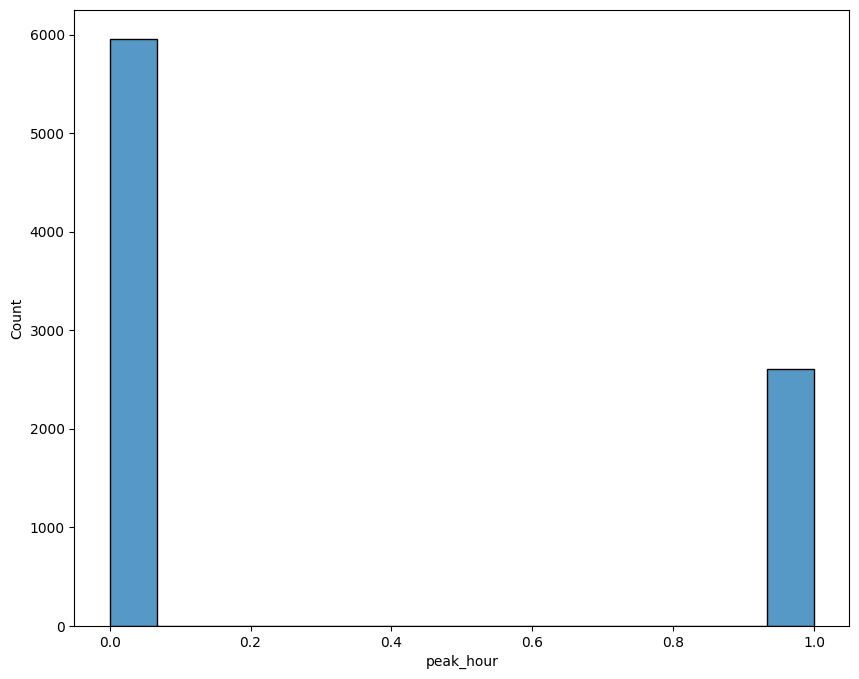

temperature


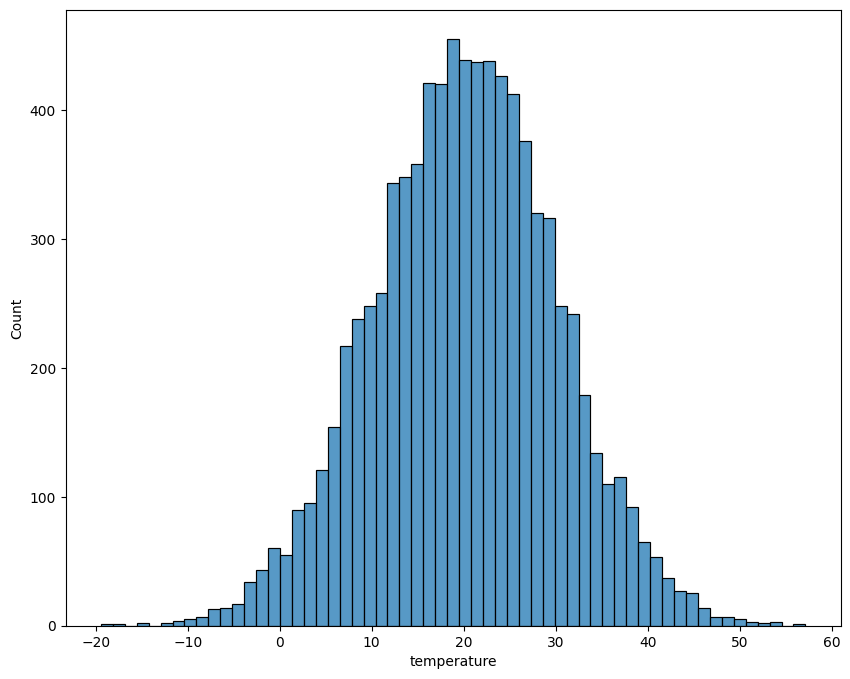

precipitation


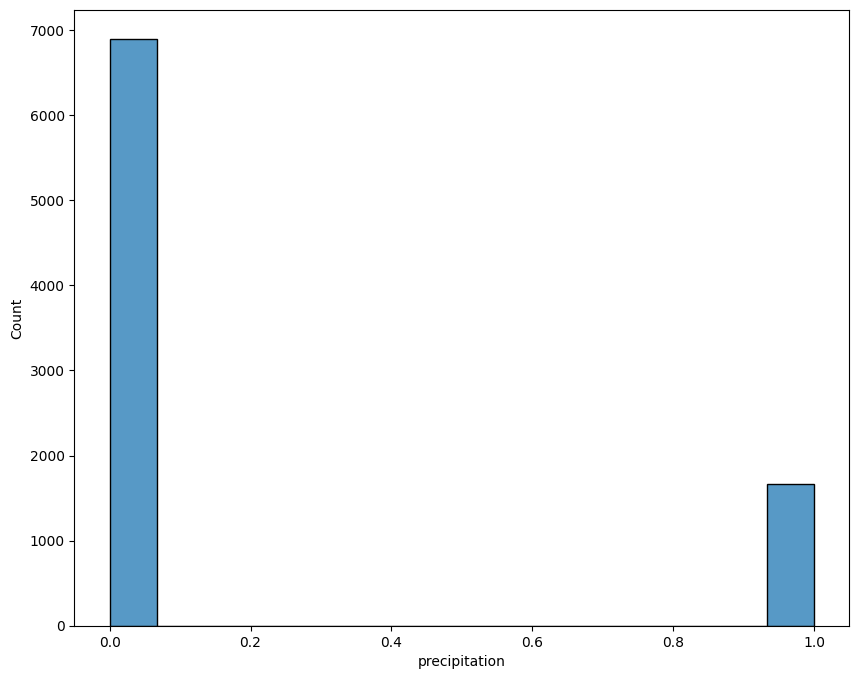

visibility


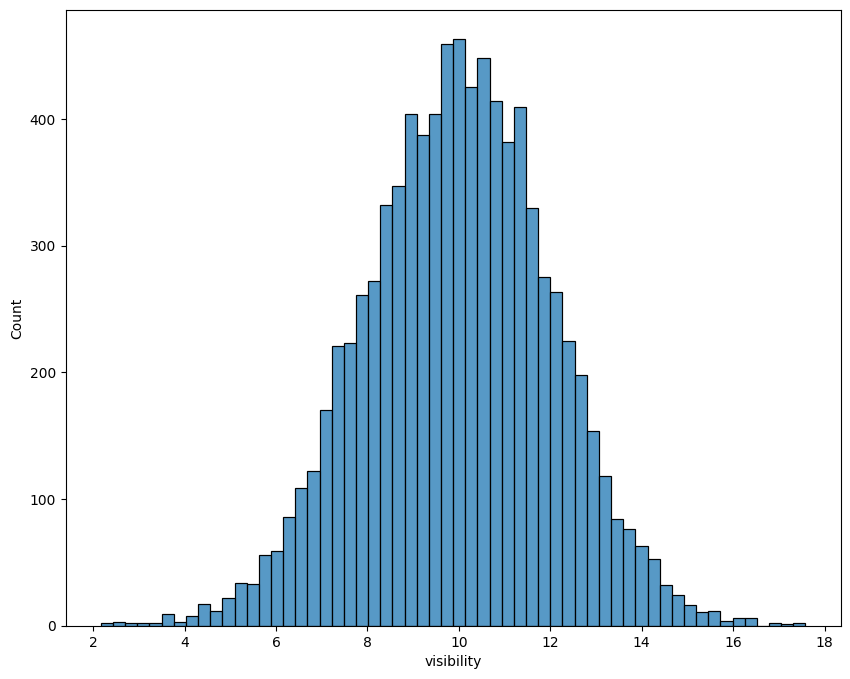

event_nearby


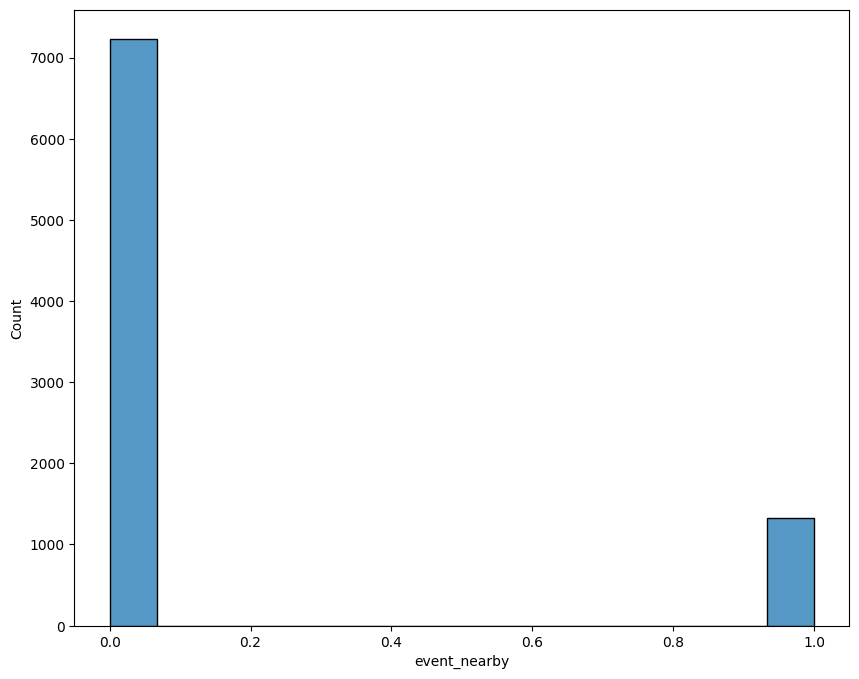

price


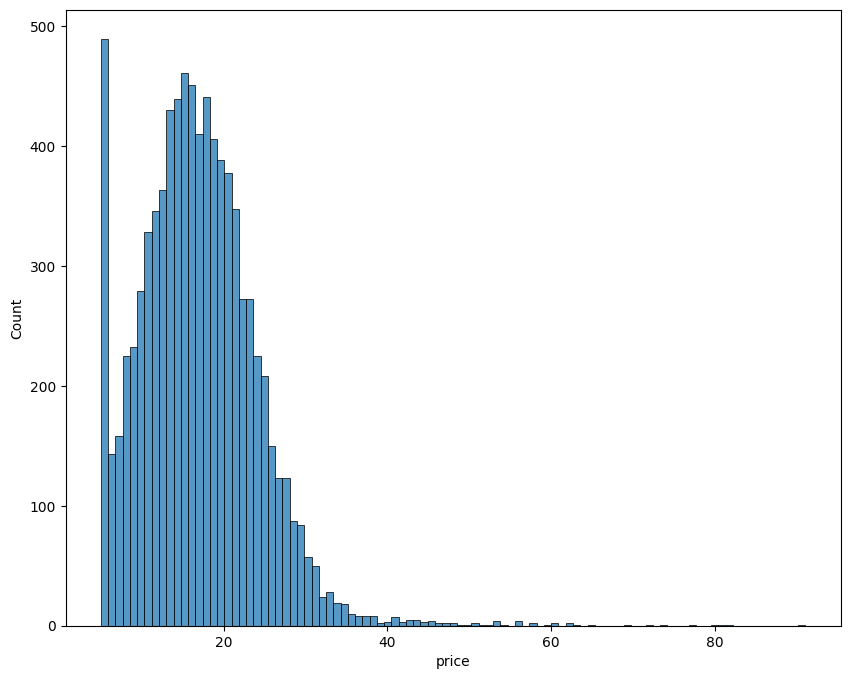

haversine_distance


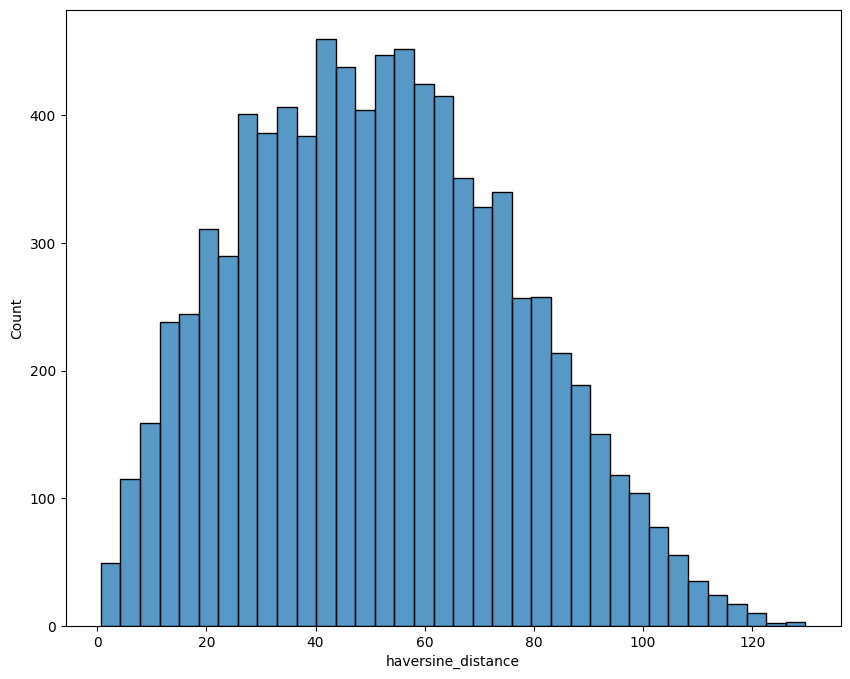

demand_multiplier


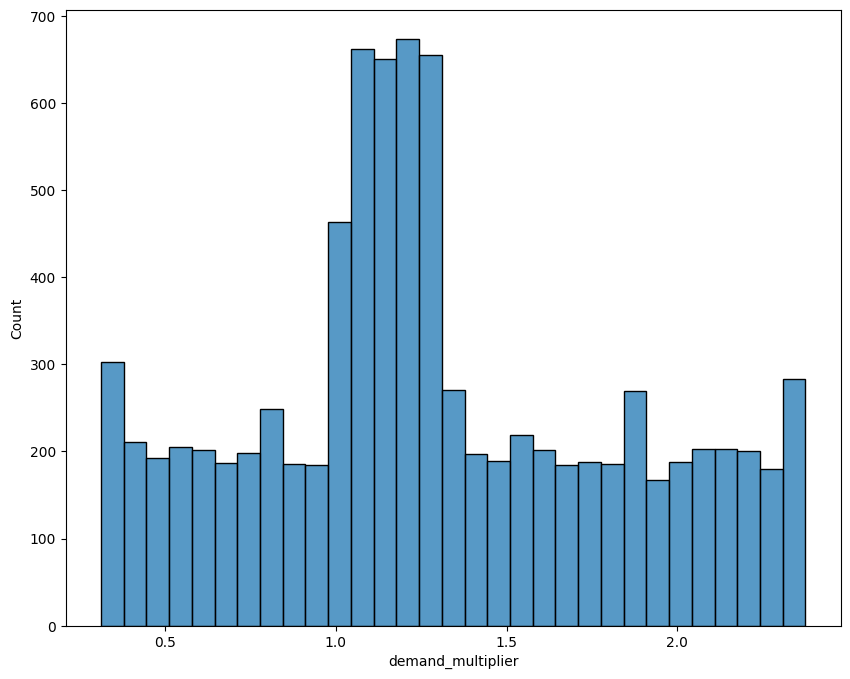

supply_multiplier


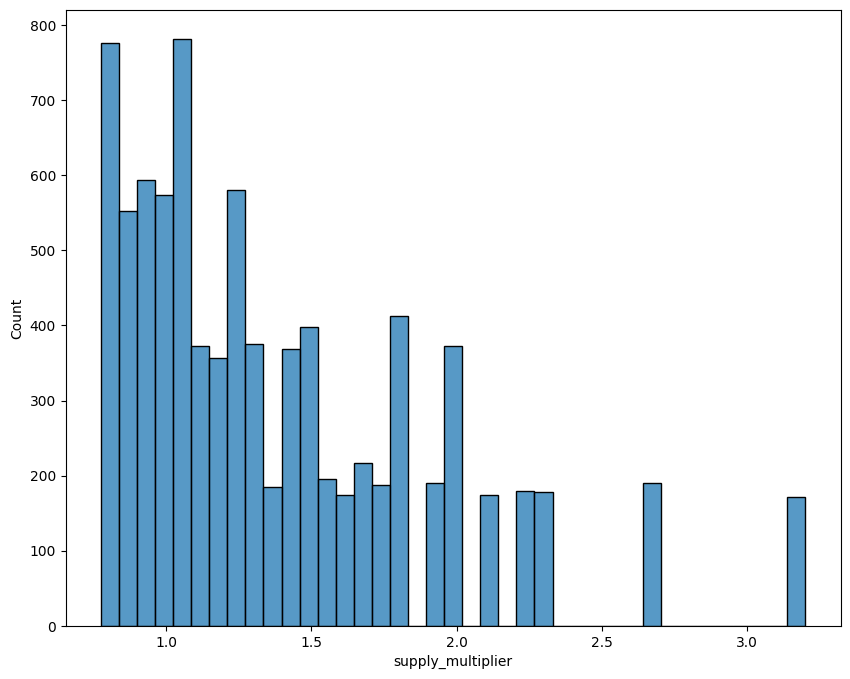

New_Price


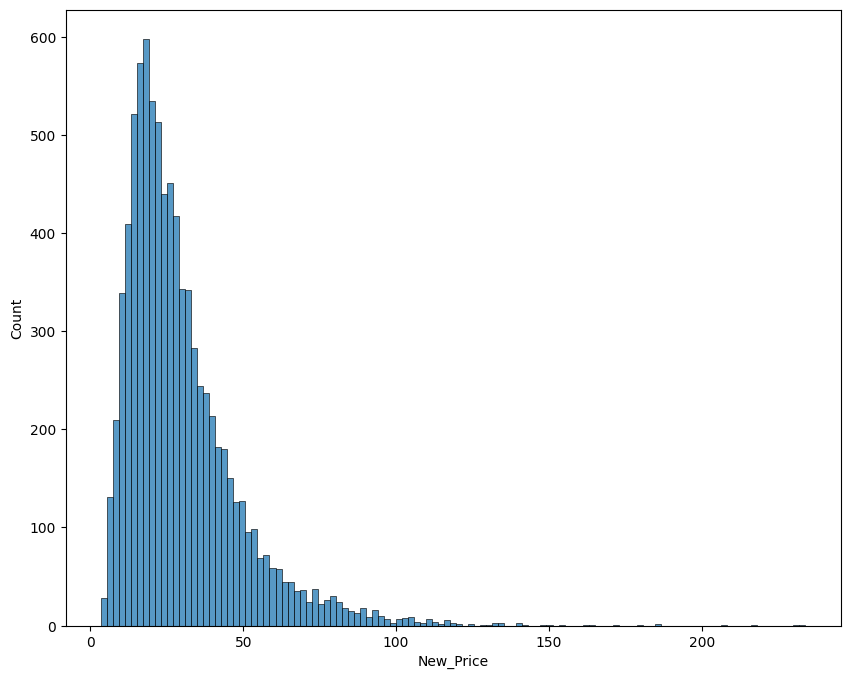

profit_percentage


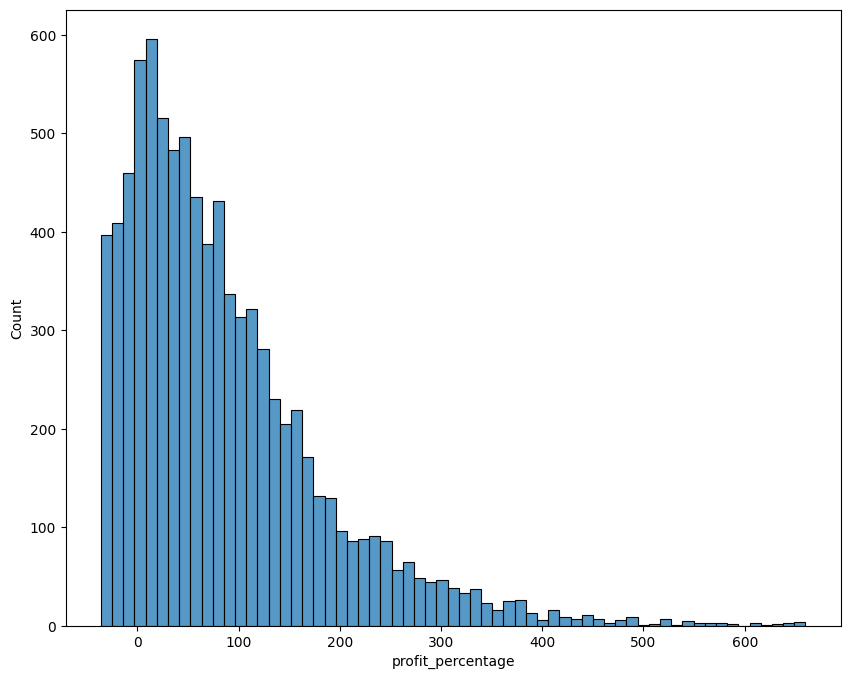

In [14]:
for i in Ride_df.columns:
    if Ride_df[i].dtype !="object":
       print(i)
       plt.figure(figsize=(10,8))
       sns.histplot(Ride_df[i])
       plt.show()

In [15]:
Ride_df

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,distance,drivers_available,ride_requests,peak_hour,temperature,precipitation,visibility,event_nearby,price,haversine_distance,demand_multiplier,supply_multiplier,New_Price,profit_percentage
0,40.874540,-74.126359,41.229998,-73.861855,1.065366,13,46,0,27.385724,0,9.542978,0,26.010994,45.307408,1.437500,1.230769,46.019451,76.923077
1,41.450714,-74.167088,40.684512,-74.040708,0.298857,40,64,0,20.378497,1,6.355968,0,15.600458,85.751169,2.000000,0.950000,29.640869,90.000000
2,41.231994,-74.323846,40.846640,-73.535501,0.405258,10,31,0,18.313723,1,10.682139,0,10.756709,78.901660,0.968750,1.600000,16.672899,55.000000
3,41.098658,-73.892733,41.163281,-74.281022,0.597809,28,41,0,37.013580,0,8.508607,0,21.057554,33.384435,1.281250,1.357143,36.615701,73.883929
4,40.656019,-74.023376,40.982089,-73.912144,0.683162,30,53,1,-14.801414,0,9.589979,1,23.649685,37.406487,1.656250,1.266667,49.615069,109.791667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,40.624614,-73.598962,40.769316,-73.575300,1.675627,46,76,0,4.058622,0,13.135812,1,26.611317,16.192877,2.375000,0.826087,52.210248,96.195652
9996,41.397509,-74.453186,41.247824,-73.735473,0.769301,38,99,0,3.413087,0,9.393715,0,10.884197,62.346407,1.302632,1.000000,14.178099,30.263158
9997,41.446708,-74.196302,40.519456,-74.230431,4.146848,14,75,0,17.223095,0,10.957781,0,19.121226,103.014709,2.343750,1.142857,51.217570,167.857143
9998,40.897488,-74.056680,40.901005,-74.065680,2.208232,38,86,0,12.792122,0,12.144354,0,12.990045,0.853044,1.131579,1.000000,14.699262,13.157895


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [17]:
coords = Ride_df[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']]

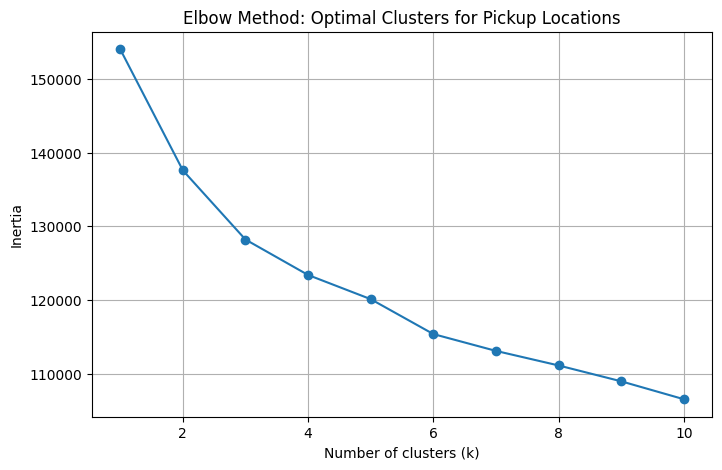

In [18]:
scaler = StandardScaler()
Ride_df[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']] = scaler.fit_transform(
    Ride_df[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']]
)
X_scaled=scaler.fit_transform(Ride_df)
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method: Optimal Clusters for Pickup Locations')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [19]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
Ride_df['pickup_cluster'] = kmeans.fit_predict(Ride_df[['pickup_latitude', 'pickup_longitude']])
Ride_df['dropoff_cluster'] = kmeans.fit_predict(Ride_df[['dropoff_latitude', 'dropoff_longitude']])

In [20]:
Ride_df

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,distance,drivers_available,ride_requests,peak_hour,temperature,precipitation,visibility,event_nearby,price,haversine_distance,demand_multiplier,supply_multiplier,New_Price,profit_percentage,pickup_cluster,dropoff_cluster
0,-0.412249,-0.452908,0.801067,0.481693,1.065366,13,46,0,27.385724,0,9.542978,0,26.010994,45.307408,1.437500,1.230769,46.019451,76.923077,2,3
1,1.590441,-0.593110,-1.094944,-0.136216,0.298857,40,64,0,20.378497,1,6.355968,0,15.600458,85.751169,2.000000,0.950000,29.640869,90.000000,1,2
2,0.830204,-1.132723,-0.531418,1.609199,0.405258,10,31,0,18.313723,1,10.682139,0,10.756709,78.901660,0.968750,1.600000,16.672899,55.000000,1,4
3,0.366751,0.351309,0.569169,-0.966466,0.597809,28,41,0,37.013580,0,8.508607,0,21.057554,33.384435,1.281250,1.357143,36.615701,73.883929,2,1
4,-1.171795,-0.098406,-0.060619,0.307954,0.683162,30,53,1,-14.801414,0,9.589979,1,23.649685,37.406487,1.656250,1.266667,49.615069,109.791667,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,-1.280952,1.362569,-0.800179,1.471701,1.675627,46,76,0,4.058622,0,13.135812,1,26.611317,16.192877,2.375000,0.826087,52.210248,96.195652,0,0
9996,1.405508,-1.577954,0.863027,0.918326,0.769301,38,99,0,3.413087,0,9.393715,0,10.884197,62.346407,1.302632,1.000000,14.178099,30.263158,1,3
9997,1.576516,-0.693673,-1.668649,-0.791681,4.146848,14,75,0,17.223095,0,10.957781,0,19.121226,103.014709,2.343750,1.142857,51.217570,167.857143,1,2
9998,-0.332486,-0.213050,-0.342454,-0.222493,2.208232,38,86,0,12.792122,0,12.144354,0,12.990045,0.853044,1.131579,1.000000,14.699262,13.157895,2,2


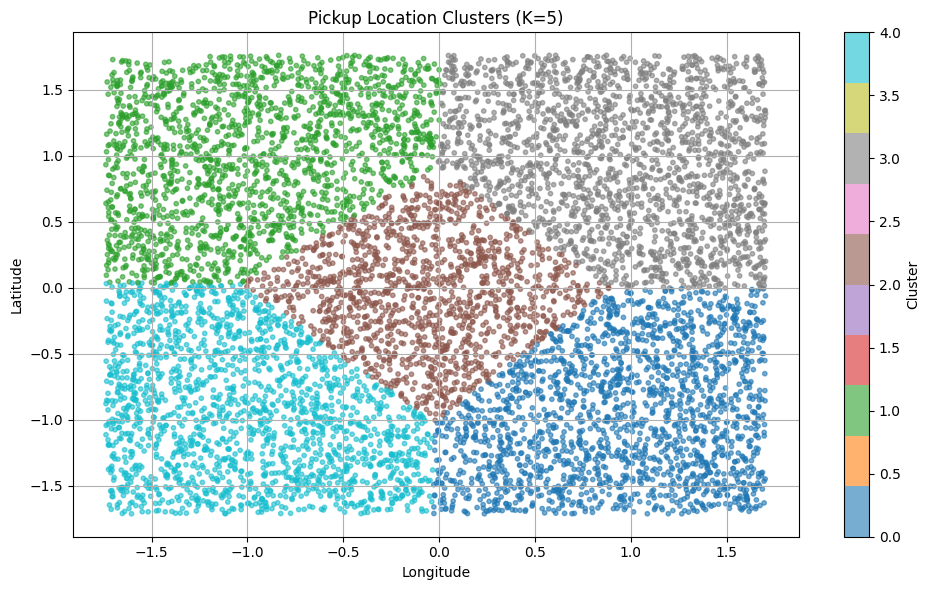

In [21]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    Ride_df['pickup_longitude'], Ride_df['pickup_latitude'],
    c=Ride_df['pickup_cluster'], cmap='tab10', alpha=0.6, s=10
)
plt.title("Pickup Location Clusters (K=5)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(scatter, label="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

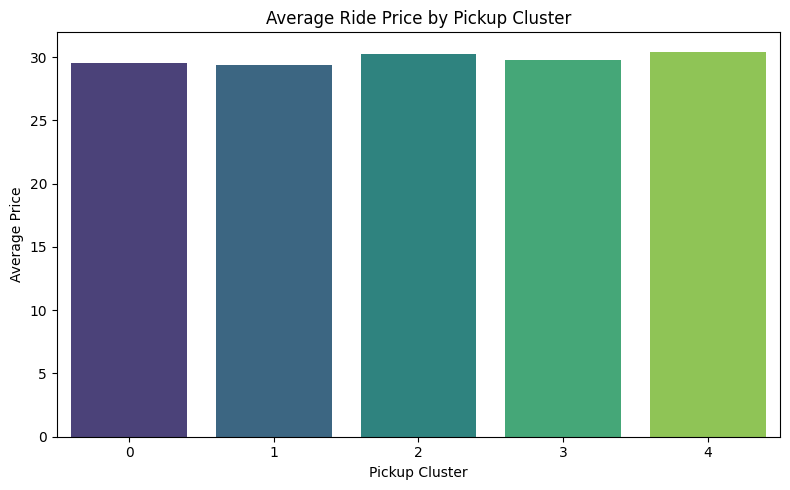

In [22]:
cluster_price_stats = Ride_df.groupby('pickup_cluster')['New_Price'].agg(['mean', 'count']).reset_index()
cluster_price_stats.columns = ['pickup_cluster', 'average_price', 'num_rides']

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(data=cluster_price_stats, x='pickup_cluster', y='average_price', palette='viridis')
plt.title('Average Ride Price by Pickup Cluster')
plt.xlabel('Pickup Cluster')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

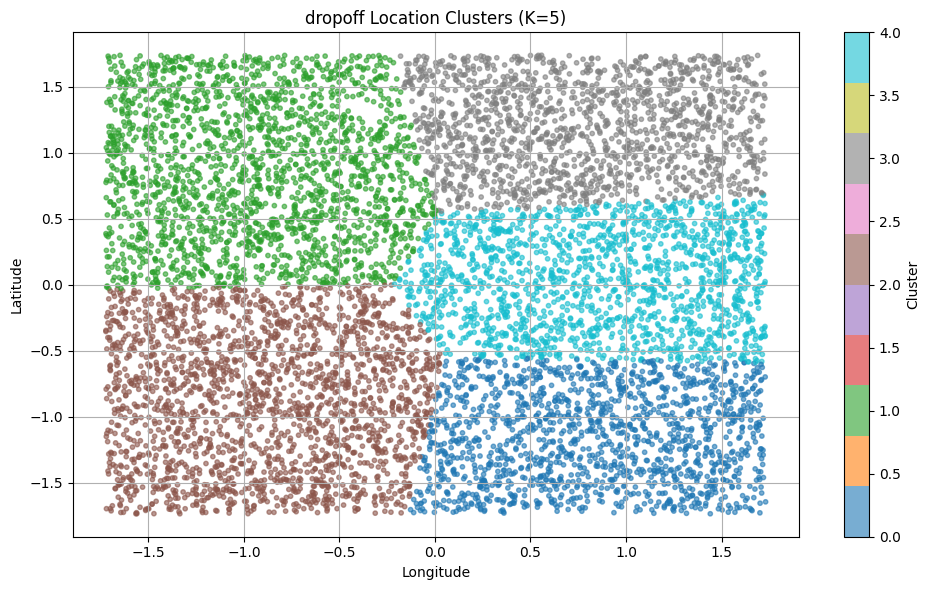

In [23]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    Ride_df['dropoff_longitude'], Ride_df['dropoff_latitude'],
    c=Ride_df['dropoff_cluster'], cmap='tab10', alpha=0.6, s=10
)
plt.title("dropoff Location Clusters (K=5)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(scatter, label="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

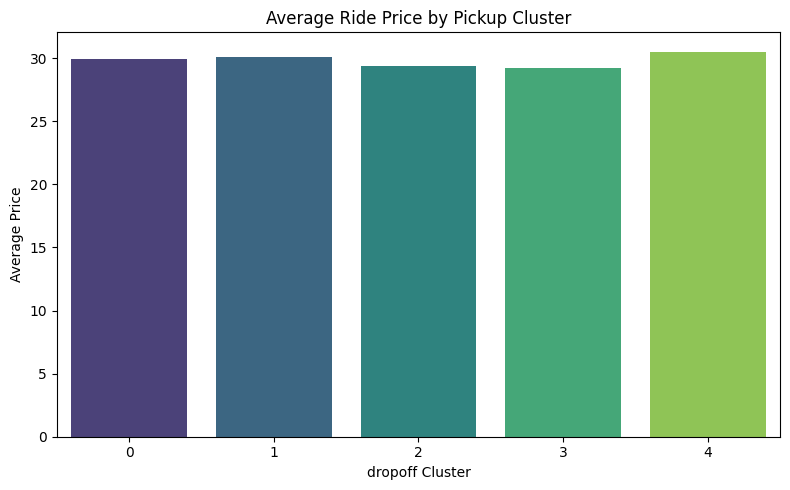

In [24]:
cluster_price_stats = Ride_df.groupby('dropoff_cluster')['New_Price'].agg(['mean', 'count']).reset_index()
cluster_price_stats.columns = ['dropoff_cluster', 'average_price', 'num_rides']

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(data=cluster_price_stats, x='dropoff_cluster', y='average_price', palette='viridis')
plt.title('Average Ride Price by Pickup Cluster')
plt.xlabel('dropoff Cluster')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

In [25]:
x = Ride_df.drop(['New_Price','visibility'],axis = 1)
y = Ride_df['New_Price']

In [26]:
Ride_df

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,distance,drivers_available,ride_requests,peak_hour,temperature,precipitation,visibility,event_nearby,price,haversine_distance,demand_multiplier,supply_multiplier,New_Price,profit_percentage,pickup_cluster,dropoff_cluster
0,-0.412249,-0.452908,0.801067,0.481693,1.065366,13,46,0,27.385724,0,9.542978,0,26.010994,45.307408,1.437500,1.230769,46.019451,76.923077,2,3
1,1.590441,-0.593110,-1.094944,-0.136216,0.298857,40,64,0,20.378497,1,6.355968,0,15.600458,85.751169,2.000000,0.950000,29.640869,90.000000,1,2
2,0.830204,-1.132723,-0.531418,1.609199,0.405258,10,31,0,18.313723,1,10.682139,0,10.756709,78.901660,0.968750,1.600000,16.672899,55.000000,1,4
3,0.366751,0.351309,0.569169,-0.966466,0.597809,28,41,0,37.013580,0,8.508607,0,21.057554,33.384435,1.281250,1.357143,36.615701,73.883929,2,1
4,-1.171795,-0.098406,-0.060619,0.307954,0.683162,30,53,1,-14.801414,0,9.589979,1,23.649685,37.406487,1.656250,1.266667,49.615069,109.791667,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,-1.280952,1.362569,-0.800179,1.471701,1.675627,46,76,0,4.058622,0,13.135812,1,26.611317,16.192877,2.375000,0.826087,52.210248,96.195652,0,0
9996,1.405508,-1.577954,0.863027,0.918326,0.769301,38,99,0,3.413087,0,9.393715,0,10.884197,62.346407,1.302632,1.000000,14.178099,30.263158,1,3
9997,1.576516,-0.693673,-1.668649,-0.791681,4.146848,14,75,0,17.223095,0,10.957781,0,19.121226,103.014709,2.343750,1.142857,51.217570,167.857143,1,2
9998,-0.332486,-0.213050,-0.342454,-0.222493,2.208232,38,86,0,12.792122,0,12.144354,0,12.990045,0.853044,1.131579,1.000000,14.699262,13.157895,2,2


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error,r2_score
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 6.81
MAE: 3.94
R² Score: 0.88


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# 1. Sample data
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Define the model
rf = RandomForestRegressor(random_state=42)

# 3. Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# 4. Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                
    scoring='neg_mean_squared_error',  
    n_jobs=-1,             
    verbose=2
)

# 5. Fit it
grid_search.fit(X_train, y_train)

# 6. Best model & parameters
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)  

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 3052.7801871031725


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error,r2_score

model_RF = RandomForestRegressor(n_estimators=200 ,max_depth = 25, min_samples_split = 7, min_samples_leaf = 5, random_state=42)
model_RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=25, min_samples_leaf=5, min_samples_split=7,
                      n_estimators=200, random_state=42)

In [31]:
y_pred = model_RF.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 3.56
MAE: 0.53
R² Score: 0.97


In [32]:
from sklearn.tree import DecisionTreeRegressor
model_DT = DecisionTreeRegressor(max_depth = 400, min_samples_split = 10, min_samples_leaf = 7, random_state=50)
model_DT.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=400, min_samples_leaf=7, min_samples_split=10,
                      random_state=50)

In [33]:
y_pred = model_DT.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 4.46
MAE: 1.24
R² Score: 0.95


In [34]:
from sklearn.ensemble import GradientBoostingRegressor
model_GB = GradientBoostingRegressor(n_estimators=235, max_depth=3, min_samples_split=18, learning_rate=0.06)
model_GB.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.06, min_samples_split=18,
                          n_estimators=235)

In [35]:
y_pred = model_GB.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 2.55
MAE: 0.74
R² Score: 0.98


In [36]:
from xgboost import XGBRegressor
model_XG = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model_XG.fit(X_train, y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [37]:
y_pred = model_XG.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 3.16
MAE: 0.64
R² Score: 0.97


In [38]:
import pickle

with open('GradientBoostingRegressor_model.pkl', 'wb') as file:
    pickle.dump(model,file)

In [39]:
import pickle

with open('RandomForestRegressor_model.pkl', 'wb') as file:
    pickle.dump(model,file)

In [40]:
Ride_df.to_csv("New_Ride.csv", index=False)

In [41]:
df=pd.read_csv('New_Ride.csv')

In [42]:
df

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,distance,drivers_available,ride_requests,peak_hour,temperature,precipitation,visibility,event_nearby,price,haversine_distance,demand_multiplier,supply_multiplier,New_Price,profit_percentage,pickup_cluster,dropoff_cluster
0,-0.412249,-0.452908,0.801067,0.481693,1.065366,13,46,0,27.385724,0,9.542978,0,26.010994,45.307408,1.437500,1.230769,46.019451,76.923077,2,3
1,1.590441,-0.593110,-1.094944,-0.136216,0.298857,40,64,0,20.378497,1,6.355968,0,15.600458,85.751169,2.000000,0.950000,29.640869,90.000000,1,2
2,0.830204,-1.132723,-0.531418,1.609199,0.405258,10,31,0,18.313723,1,10.682139,0,10.756709,78.901660,0.968750,1.600000,16.672899,55.000000,1,4
3,0.366751,0.351309,0.569169,-0.966466,0.597809,28,41,0,37.013580,0,8.508607,0,21.057554,33.384435,1.281250,1.357143,36.615701,73.883929,2,1
4,-1.171795,-0.098406,-0.060619,0.307954,0.683162,30,53,1,-14.801414,0,9.589979,1,23.649685,37.406487,1.656250,1.266667,49.615069,109.791667,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8552,-1.280952,1.362569,-0.800179,1.471701,1.675627,46,76,0,4.058622,0,13.135812,1,26.611317,16.192877,2.375000,0.826087,52.210248,96.195652,0,0
8553,1.405508,-1.577954,0.863027,0.918326,0.769301,38,99,0,3.413087,0,9.393715,0,10.884197,62.346407,1.302632,1.000000,14.178099,30.263158,1,3
8554,1.576516,-0.693673,-1.668649,-0.791681,4.146848,14,75,0,17.223095,0,10.957781,0,19.121226,103.014709,2.343750,1.142857,51.217570,167.857143,1,2
8555,-0.332486,-0.213050,-0.342454,-0.222493,2.208232,38,86,0,12.792122,0,12.144354,0,12.990045,0.853044,1.131579,1.000000,14.699262,13.157895,2,2


In [43]:
model.feature_names_in_

array(['pickup_latitude', 'pickup_longitude', 'dropoff_latitude',
       'dropoff_longitude', 'distance', 'drivers_available',
       'ride_requests', 'peak_hour', 'temperature', 'precipitation',
       'event_nearby', 'price', 'haversine_distance', 'demand_multiplier',
       'supply_multiplier', 'profit_percentage', 'pickup_cluster',
       'dropoff_cluster'], dtype=object)